In [1]:
import sys
sys.path.append('/data/nsoontie/MEOPAR/mixing-paper/analysis')

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import datetime

import mixing
from nowcast import analyze

%matplotlib inline

# Load Nowcast-green

In [2]:
sdt = datetime.datetime(2016,4,1)
edt = datetime.datetime(2016,7,28)
xs=slice(150,300)
ys=slice(200,400)
files = analyze.get_filenames(sdt, edt, '1d', 'grid_T', '/results/SalishSea/nowcast-green/')
d = xr.open_dataset(files[0]).isel(x=xs, y=ys)
for f in files[1:]:
    with xr.open_dataset(f).isel(x=xs, y=ys) as d1:
        d =xr.concat([d,d1],dim='time_counter',data_vars='minimal')


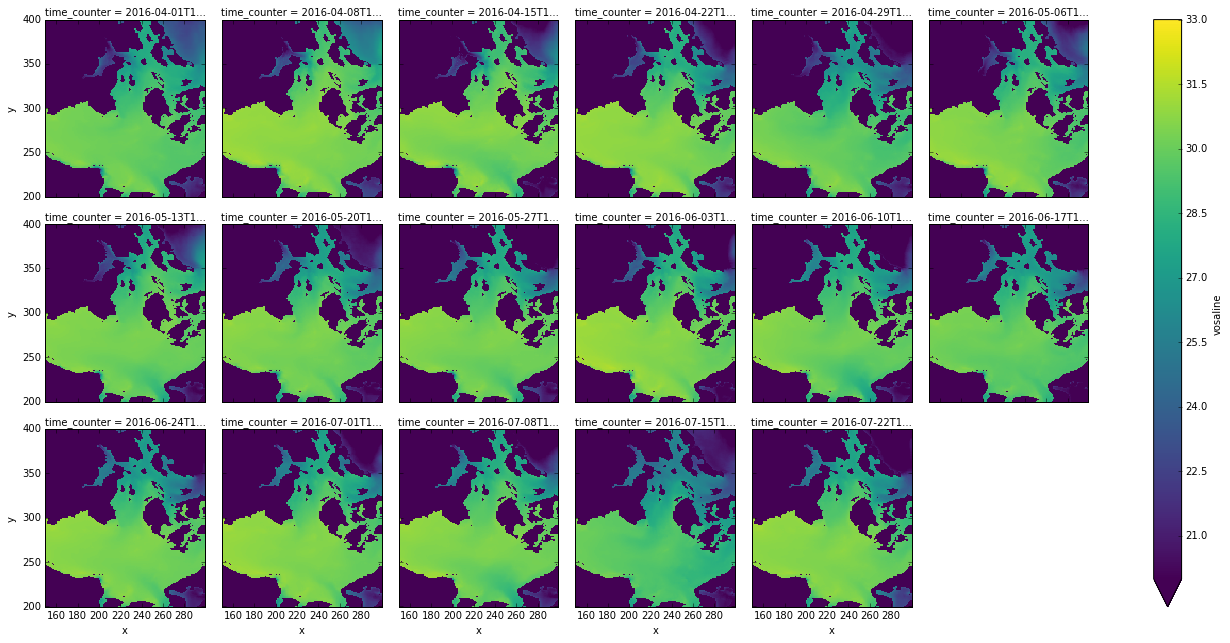

In [3]:
salt_surface = d.sel(deptht=0,method='nearest').vosaline
salt_surface.resample('7D', dim='time_counter').plot(col='time_counter', col_wrap=6,x='x',y='y',
                      vmin=20,vmax=33)

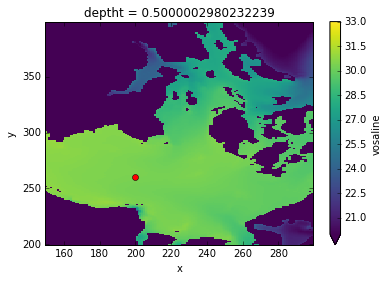

In [4]:
i=200
j=260
fig,ax= plt.subplots(1,1)
d.sel(deptht=0,method='nearest').vosaline.mean(dim='time_counter').plot( vmin=20,vmax=33,ax=ax)
ax.plot(i,j,'or')

(140, 0)

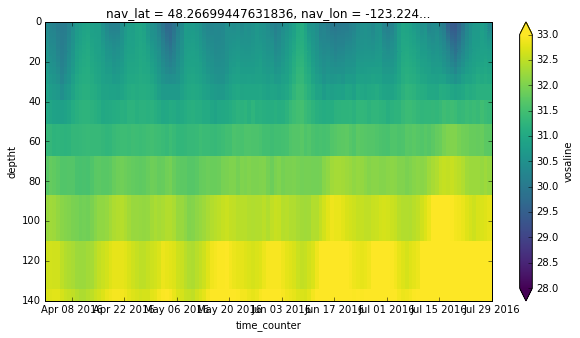

In [5]:
fig,ax= plt.subplots(1,1,figsize=(10,5))
d.sel(x=i,y=j).vosaline.plot(x='time_counter',y='deptht',vmin=28,vmax=33,ax=ax)
ax.set_ylim([140,0])

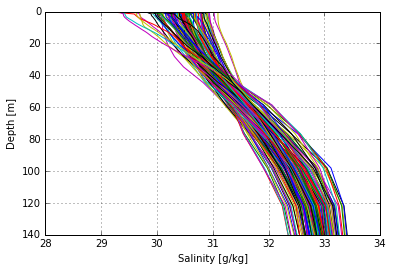

In [6]:
fig,ax=plt.subplots(1,1)
profile = d.sel(x=i,y=j)
for t in np.arange(profile.vosaline.shape[0]):
    ax.plot(profile.vosaline.values[t,:], profile.deptht.values[:], )
ax.set_ylim([140,0])
ax.set_xlim([28,34])
ax.grid()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Salinity [g/kg]')

We are actually pretty stratified in the daily averages. Maybe the other case was fully mixed because it didn't have the Hollingsworth correction...

* August 2015 casts from PSF had about 33.5 psu at 140 m at 31 to 31.5 psu at surface.